### OLA - Ensemble Learning

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

Analytics Department of Ola, focused on driver team attrition. We are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not. 

If we predict before by looking at different attributes of driver. we can implement some ways to retain that driver not to leave either by increasing income or increase his grade. If we cannot retain them back also we might have an estimation of how many drivers may require to recruit before they leave.

**Column Profiling:**

1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
ola_driver_data = pd.read_csv('ola_driver_scaler.csv')
prep_ola_data = pd.read_csv('ola_driver_scaler.csv')

In [44]:
ola_driver_data[:40].T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
MMM-YY,01/01/19,02/01/19,03/01/19,11/01/20,12/01/20,12/01/19,01/01/20,02/01/20,03/01/20,04/01/20,...,03/01/19,04/01/19,05/01/19,06/01/19,07/01/19,08/01/19,09/01/19,10/01/19,11/01/19,12/01/19
Driver_ID,1,1,1,2,2,4,4,4,4,4,...,13,13,13,13,13,13,13,13,13,13
Age,28.0,28.0,28.0,31.0,31.0,43.0,43.0,43.0,43.0,43.0,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,30.0,30.0
Gender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
City,C23,C23,C23,C7,C7,C13,C13,C13,C13,C13,...,C19,C19,C19,C19,C19,C19,C19,C19,C19,C19
Education_Level,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Income,57387,57387,57387,67016,67016,65603,65603,65603,65603,65603,...,119227,119227,119227,119227,119227,119227,119227,119227,119227,119227
Dateofjoining,24/12/18,24/12/18,24/12/18,11/06/20,11/06/20,12/07/19,12/07/19,12/07/19,12/07/19,12/07/19,...,28/05/15,28/05/15,28/05/15,28/05/15,28/05/15,28/05/15,28/05/15,28/05/15,28/05/15,28/05/15
LastWorkingDate,NaN,NaN,03/11/19,NaN,NaN,NaN,NaN,NaN,NaN,27/04/20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let us group the data with respect to driver id then we can do EDA**

In [45]:
# Dropping sl.no of data
ola_driver_data.drop(columns='Unnamed: 0',inplace=True)

In [46]:
# Creating features to get the first Income, Grade, Business_value, Quaterly_rating while agg in grp by
ola_driver_data['First_Income']= ola_driver_data['Income']
ola_driver_data['First_Grade']= ola_driver_data['Grade']
ola_driver_data['Avg_Business_Value']= ola_driver_data['Total Business Value']
ola_driver_data['First_Quarterly_Rating'] = ola_driver_data['Quarterly Rating']

In [47]:
# Grouping data by driver id and aggregating the other features by 'first', 'last', 'sum'.
grp_ola_data = ola_driver_data.groupby('Driver_ID').agg({'MMM-YY':'last','Age':lambda x: x.value_counts().index[0],'Gender':'last',
                                          'City':'last','Education_Level':'first','Income':'last','Dateofjoining':'first',
                                          'LastWorkingDate':'last','Joining Designation':'first','Grade':'first','Total Business Value':'sum','Avg_Business_Value':'mean',
                                          'Quarterly Rating':'last','First_Income':'first','First_Grade':'first','First_Quarterly_Rating':'first'}).reset_index()

In [48]:
# Creating target_variable from lastworkingday feature
grp_ola_data['target_variable'] = (~(grp_ola_data['LastWorkingDate'].isna()))*1

In [49]:
# Creating features which gives info whether there Quaterly_rating, Income, Grade are increasing.
grp_ola_data['Inc_Quaterly_Rating'] = (grp_ola_data['Quarterly Rating']>grp_ola_data['First_Quarterly_Rating'])*1
grp_ola_data['Inc_Income'] = (grp_ola_data['First_Income']<grp_ola_data['Income'])*1
grp_ola_data['Inc_Grade'] = (grp_ola_data['First_Grade']<grp_ola_data['Grade'])*1

In [50]:
# Checking Imbalance of data
grp_ola_data['target_variable'].value_counts()

1    1616
0     765
Name: target_variable, dtype: int64

- Data is imbalanced so we can do oversample of minority class or we can directly put class weights while training the model.

In [51]:
# Converting date-like features to their datetime64 data type
grp_ola_data['Dateofjoining'] = pd.to_datetime(grp_ola_data['Dateofjoining'])
grp_ola_data['LastWorkingDate'] = pd.to_datetime(grp_ola_data['LastWorkingDate'])

In [52]:
grp_ola_data.isna().sum()

Driver_ID                   0
MMM-YY                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate           765
Joining Designation         0
Grade                       0
Total Business Value        0
Avg_Business_Value          0
Quarterly Rating            0
First_Income                0
First_Grade                 0
First_Quarterly_Rating      0
target_variable             0
Inc_Quaterly_Rating         0
Inc_Income                  0
Inc_Grade                   0
dtype: int64

- Since we not give LastWorkingDate feature input to train, so we no need to handle null value.

<AxesSubplot:xlabel='Avg_Business_Value', ylabel='Count'>

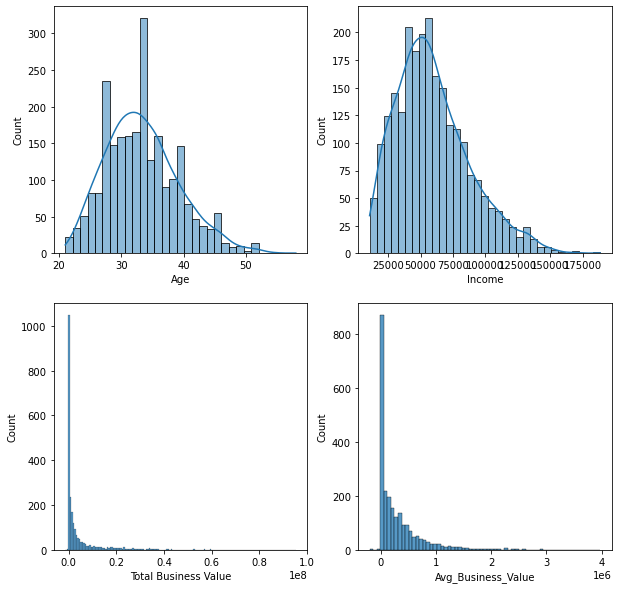

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=grp_ola_data,x='Age',kde=True)
plt.subplot(2,2,2)
sns.histplot(data=grp_ola_data,x='Income',kde=True)
plt.subplot(2,2,3)
sns.histplot(data=grp_ola_data,x='Total Business Value')
plt.subplot(2,2,4)
sns.histplot(data=grp_ola_data,x='Avg_Business_Value')

- None of them are following Normal distribution. For tree based models it is not required to follow gaussian.

<AxesSubplot:xlabel='target_variable', ylabel='count'>

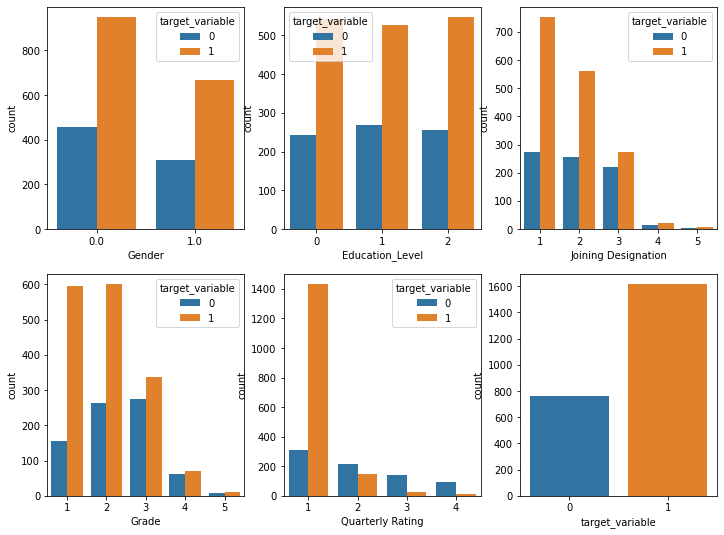

In [55]:
plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
sns.countplot(data=grp_ola_data,x='Gender',hue='target_variable')
plt.subplot(2,3,2)
sns.countplot(data=grp_ola_data,x='Education_Level',hue='target_variable')
plt.subplot(2,3,3)
sns.countplot(data=grp_ola_data,x='Joining Designation',hue='target_variable')
plt.subplot(2,3,4)
sns.countplot(data=grp_ola_data,x='Grade',hue='target_variable')
plt.subplot(2,3,5)
sns.countplot(data=grp_ola_data,x='Quarterly Rating',hue='target_variable')
plt.subplot(2,3,6)
sns.countplot(data=grp_ola_data,x='target_variable')

<AxesSubplot:xlabel='Grade', ylabel='Income'>

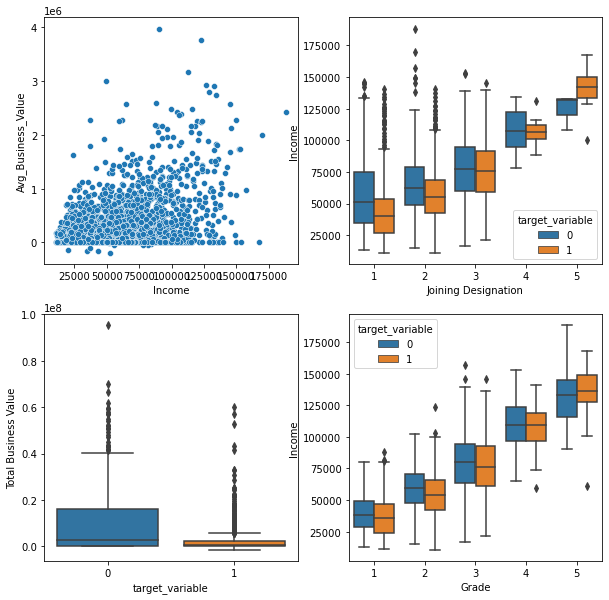

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(data=grp_ola_data,x='Income',y='Avg_Business_Value')
plt.subplot(2,2,2)
sns.boxplot(data=grp_ola_data,y='Income',x='Joining Designation',hue='target_variable')
plt.subplot(2,2,3)
sns.boxplot(data=grp_ola_data,y='Total Business Value',x='target_variable')
plt.subplot(2,2,4)
sns.boxplot(data=grp_ola_data,y='Income',x='Grade',hue='target_variable')

<AxesSubplot:>

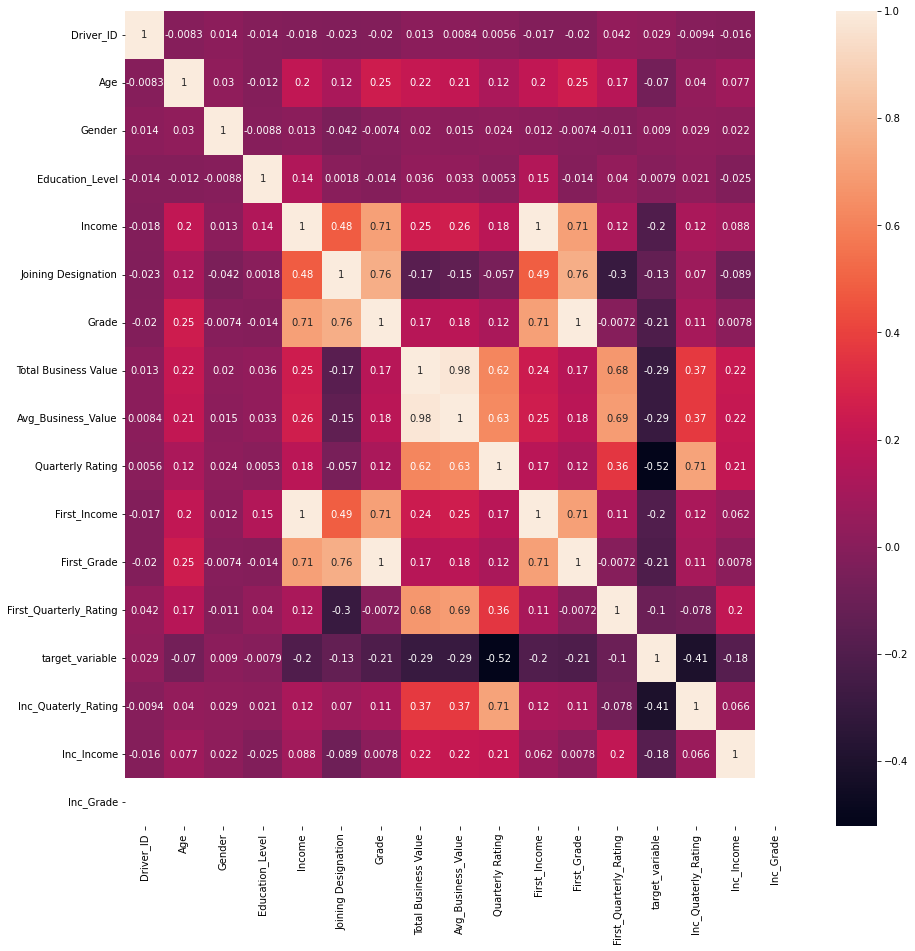

In [156]:
plt.figure(figsize=(15,15))
sns.heatmap(data=grp_ola_data.corr(method='spearman'),annot=True)

In [57]:
grp_ola_data.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Avg_Business_Value',
       'Quarterly Rating', 'First_Income', 'First_Grade',
       'First_Quarterly_Rating', 'target_variable', 'Inc_Quaterly_Rating',
       'Inc_Income', 'Inc_Grade'],
      dtype='object')

In [58]:
grp_ola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Driver_ID               2381 non-null   int64         
 1   MMM-YY                  2381 non-null   object        
 2   Age                     2381 non-null   float64       
 3   Gender                  2381 non-null   float64       
 4   City                    2381 non-null   object        
 5   Education_Level         2381 non-null   int64         
 6   Income                  2381 non-null   int64         
 7   Dateofjoining           2381 non-null   datetime64[ns]
 8   LastWorkingDate         1616 non-null   datetime64[ns]
 9   Joining Designation     2381 non-null   int64         
 10  Grade                   2381 non-null   int64         
 11  Total Business Value    2381 non-null   int64         
 12  Avg_Business_Value      2381 non-null   float64 

In [157]:
grp_ola_data.describe(include='all')

C:\Users\vemul\AppData\Local\Temp/ipykernel_15584/189150973.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  grp_ola_data.describe(include='all')


,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Total Business Value,Avg_Business_Value,Quarterly Rating,First_Income,First_Grade,First_Quarterly_Rating,target_variable,Inc_Quaterly_Rating,Inc_Income,Inc_Grade
count,2381.000000,2381,2381.000000,2381.000000,2381,2381.00000,2381.000000,2381,1616,2381.000000,...,2.381000e+03,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.0
unique,NaN,24,NaN,NaN,29,NaN,NaN,869,493,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,12/01/20,NaN,NaN,C20,NaN,NaN,2020-07-31 00:00:00,2020-07-29 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,819,NaN,NaN,152,NaN,NaN,31,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-01 00:00:00,2018-12-31 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-28 00:00:00,2020-12-28 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1397.559009,NaN,33.350273,0.410332,NaN,1.00756,59334.157077,NaN,NaN,1.820244,...,4.586742e+06,3.120854e+05,1.427971,59209.060899,2.078538,1.486350,0.678706,0.150357,0.018060,0.0
std,806.161628,NaN,5.894944,0.491997,NaN,0.81629,28383.666384,NaN,NaN,0.841433,...,9.127115e+06,4.495705e+05,0.809839,28275.899087,0.931321,0.834348,0.467071,0.357496,0.133195,0.0
min,1.000000,NaN,21.000000,0.000000,NaN,0.00000,10747.000000,NaN,NaN,1.000000,...,-1.385530e+06,-1.979329e+05,1.000000,10747.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,695.000000,NaN,29.000000,0.000000,NaN,0.00000,39104.000000,NaN,NaN,1.000000,...,0.000000e+00,0.000000e+00,1.000000,39104.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0


**Feature Engineering** is done while grouping the data by driver id above

**Class Imbalance** treatment is balanced by class weights while creating model

**Train Test Split**

In [118]:
X = grp_ola_data.drop(columns=['Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate','First_Income', 'First_Grade',
                                'City','First_Quarterly_Rating', 'target_variable'])
y = grp_ola_data[['target_variable']]    

In [61]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Random Forest (Bagging model)

In [73]:
# Defining Parametes
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [6,8,9,10]
         }

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


tuning_function = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced'), 
                               param_grid = params,
                               scoring = 'f1',
                               cv = StratifiedKFold(n_splits=5, shuffle = True),
                               n_jobs=-1
                               )

In [77]:
# Now we will fit all combinations, this will take some time to run. (5-6 mins)
tuning_function.fit(X_train, y_train)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 400}
0.8604268546652986


In [111]:
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier( bootstrap=True, criterion='entropy', max_depth=8, max_features=6, n_estimators=200,class_weight='balanced')
kfold = StratifiedKFold(n_splits=5, shuffle = True)
cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'f1', return_train_score = True)

print(f"K-Fold f1 Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold f1 Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold f1 Mean: Train: 91.29951595794583 Validation: 85.02801392541002
K-Fold f1 Std: Train: 0.3225518738218792 Validation: 1.266922590097858


In [112]:
tree_clf.fit(X_train,y_train)

y_rf_pred = tree_clf.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, ConfusionMatrixDisplay, f1_score, roc_auc_score,classification_report, roc_curve

In [114]:
cm=confusion_matrix(y_true=y_test,y_pred=y_rf_pred)
cm

array([[104,  49],
       [ 44, 280]], dtype=int64)

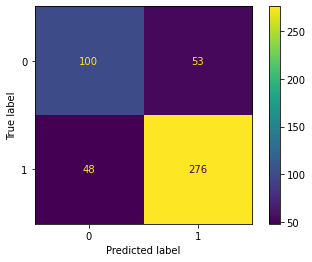

In [32]:
ConfusionMatrixDisplay(cm).plot()

In [115]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       153
           1       0.85      0.86      0.86       324

    accuracy                           0.81       477
   macro avg       0.78      0.77      0.77       477
weighted avg       0.80      0.81      0.80       477



In [146]:
roc_auc_score(y_test,y_rf_pred)

0.7719680464778503

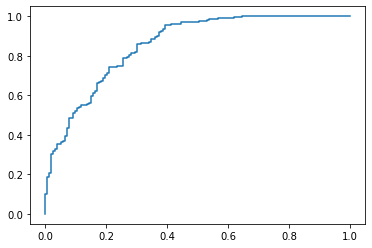

In [149]:
y_pred_proba = tree_clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)

### GBDT (Boosting Model):

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'n_estimators' : [100,200,300],
        'learning_rate': [0.05,0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgbm = XGBClassifier(objective='binary:logistic',scale_pos_weight=2)


In [69]:
gridSearchCV = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',scale_pos_weight=2), 
                               param_grid = params,
                               scoring = 'f1',
                               cv = StratifiedKFold(n_splits=5, shuffle = True))
gridSearchCV.fit(X_train, y_train)
print('\n Best hyperparameters:')
print(gridSearchCV.best_params_)


 Best hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [145]:
best_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', subsample=0.8, max_depth=5, learning_rate=0.01, colsample_bytree=1.0,scale_pos_weight=0.5)
best_xgb.fit(X_train, y_train)

print(f"\nTraining accuracy:{best_xgb.score(X_train, y_train)}\nTest Accuracy: {best_xgb.score(X_test, y_test)}")


Training accuracy:0.8314075630252101
Test Accuracy: 0.8029350104821803


In [142]:
best_xgb.fit(X_train,y_train)

y_xgb_pred = best_xgb.predict(X_test)

In [143]:
cm_xgb=confusion_matrix(y_true=y_test,y_pred=y_xgb_pred)
cm_xgb

array([[ 98,  55],
       [ 26, 298]], dtype=int64)

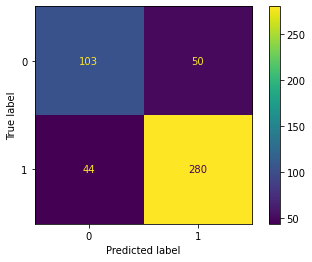

In [144]:
ConfusionMatrixDisplay(cm_xgb).plot()

In [139]:
print(classification_report(y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       153
           1       0.85      0.86      0.86       324

    accuracy                           0.80       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.80      0.80      0.80       477



In [150]:
roc_auc_score(y_test,y_xgb_pred)

0.7801379811183732

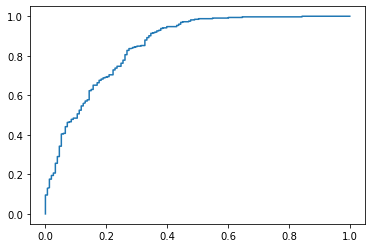

In [151]:
y_pred_proba = best_xgb.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)

### Actionable Insights & Recommendations:

- By predicting who are the drivers will be leaving the company. From the company providing hike or appreciation will motivate the drivers to stay.
- Knowing the number of drivers might leave the company will make company to balance demand of drivers at particular place.
- By predicting it with every individual city appropriate number of drivers may leave. It will be easy to manage the demand of drivers in every city.
- Quaterly reports and Increase in Quaterly report are the main feature to look for a driver that is related to there leaving job.
- we can use scoring metric as recall if we dont want to have any false negative(driver left but predicted not), this is used if the recruitment is very costly. But that makes more number of prediction for false positive (predicted left but actually not), this makes hikes and appreciation of many drivers who are not willing to leave only.
- To balance these we used f1 score which makes balance between FN and FP. This gives the total count of drivers who might leave correctly.